<a href="https://colab.research.google.com/github/Paymanshus/ML-Sem-V/blob/master/ML_J046_Exp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd

In [3]:
df = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

In [4]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [5]:
df.shape

(195, 43)

In [6]:
df.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Continent-region','DevName':'Development-status'}, inplace=True)

df.set_index('Country', inplace=True)

df['Total_count']=df.sum(axis='columns')

In [11]:
years = list(map(str,range(1984, 2014)))
years

['1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [16]:
df_continents = df.groupby('Continent', axis='index').sum()
df_continents

,AREA,REG,DEV,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total_count
Continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,48762,49242,48708,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543,765660
Asia,45815,109147,44197,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075,3516953
Europe,39044,39754,38743,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691,1528488
Latin America and the Caribbean,29832,30395,29766,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950,855141
Northern America,1810,1810,1802,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503,246564
Oceania,12726,13210,12626,1942,1839,1675,1018,878,920,904,1200,1181,1539,2075,2495,2871,2566,1967,1565,1552,1263,1021,1055,1276,1818,1685,1800,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775,93736


###Pie Chart

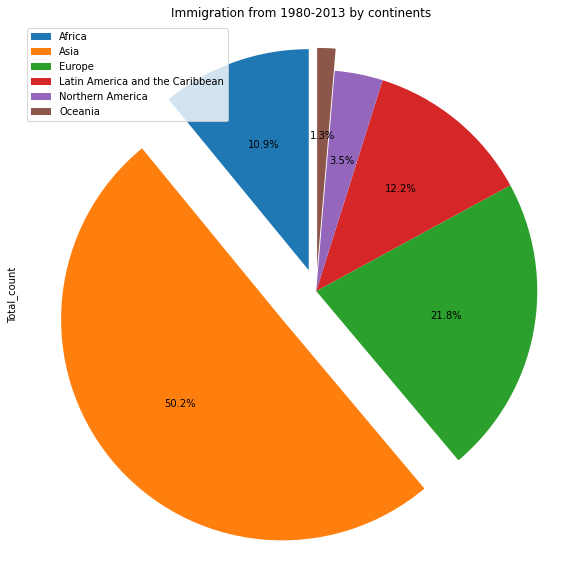

In [18]:
explodelist = [0.1,0.2,0,0,0,0.1]

df_continents['Total_count'].plot(
    kind='pie',
    figsize=(10,10),
    startangle=90,
    autopct='%1.1f%%',
    shadow=False,
    labels=None,
    explode=explodelist
)

plt.title('Immigration from 1980-2013 by continents')
plt.axis('equal') #pie chart looks like a circle
plt.legend(labels=df_continents.index, loc='upper left')
plt.show()

Pie chart of development status

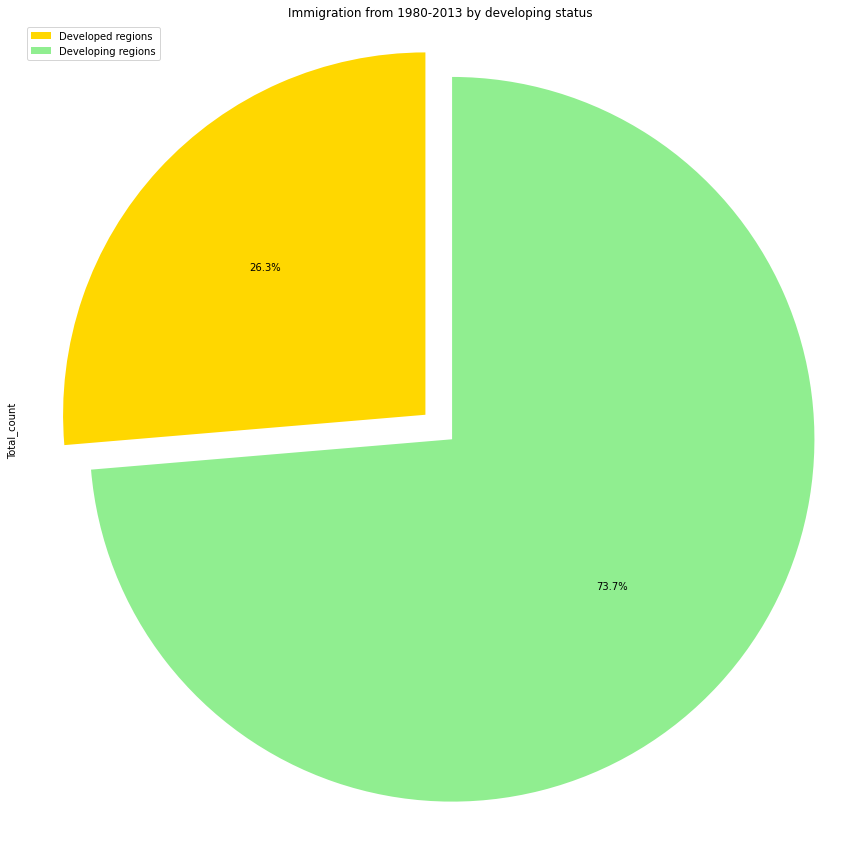

In [23]:
colorlist = ['gold', 'lightgreen']
explodelist = [0,0.1]


df_devstatus['Total_count'].plot(
    kind='pie',
    figsize=(15,15),
    startangle=90,
    autopct='%1.1f%%',
    shadow=False,
    labels=None,
    colors=colorlist,
    explode=explodelist
)

plt.title('Immigration from 1980-2013 by developing status')
plt.axis('equal') #pie chart looks like a circle
plt.legend(labels=df_devstatus.index, loc='upper left')
plt.show()